In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline


In [2]:
# Read in the image
image = cv2.imread('aeroplane.jpeg')

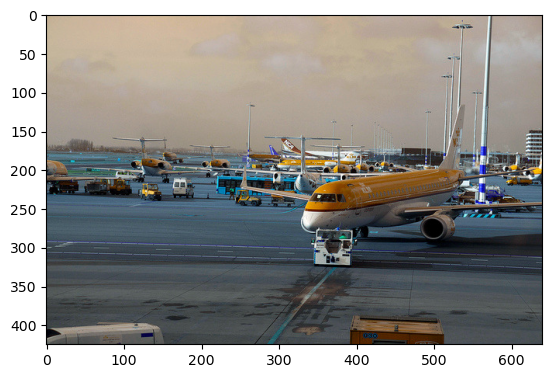

In [3]:
##Sobel edge detection
import cv2
# Read the original image
img = cv2.imread('aeroplane.jpeg')
# Display original image
plt.imshow(img)
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection


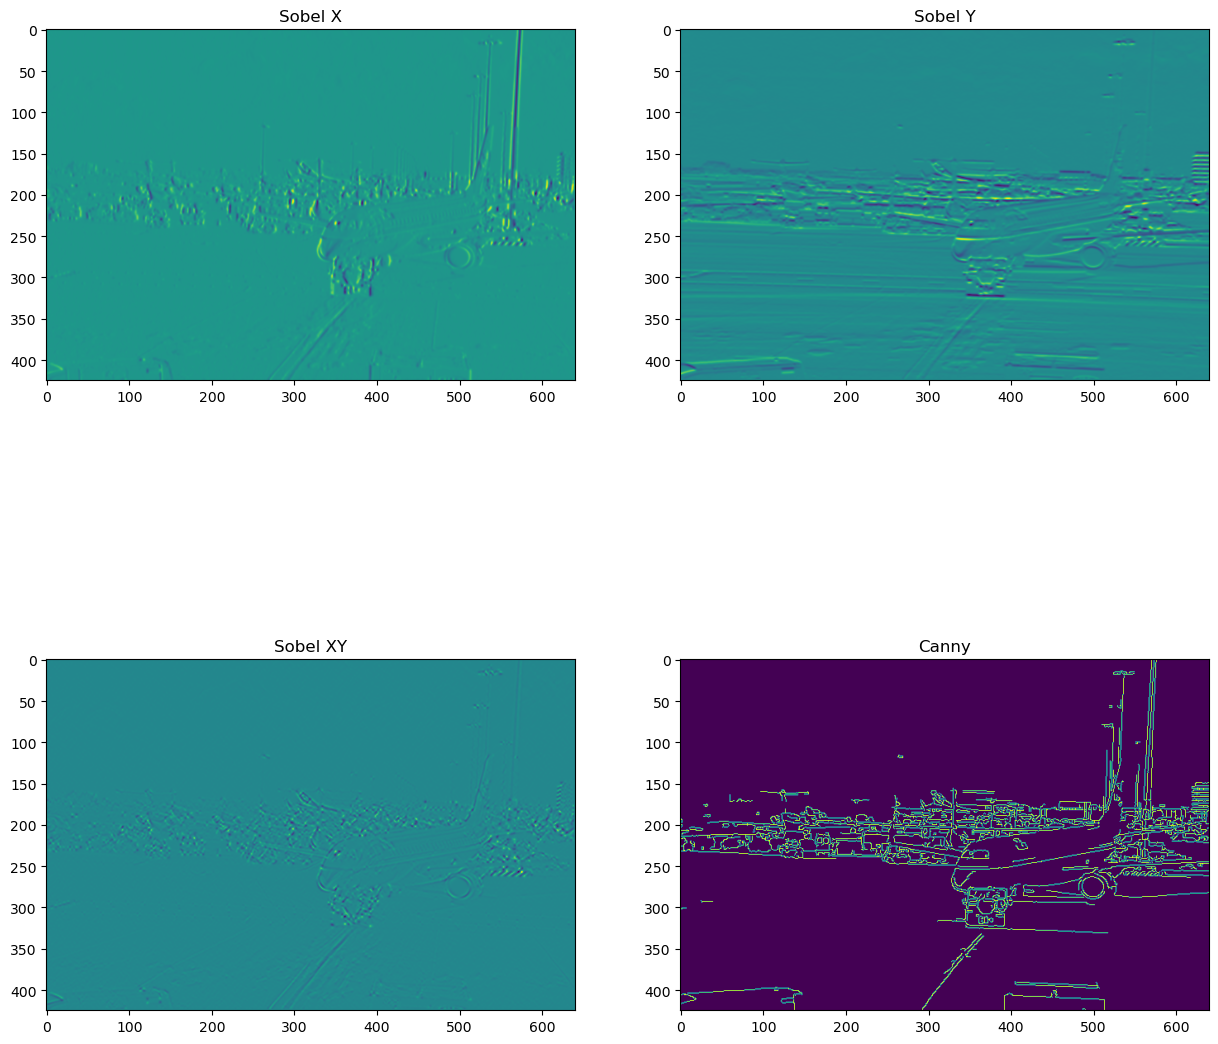

In [4]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.figure(figsize=(15,15))
Titles =["Sobel X", "Sobel Y", "Sobel XY", "Canny"]
images =[sobelx, sobely, sobelxy, edges]
count = 4
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
plt.show()

In [6]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0 

In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1] 

In [13]:
#Create the Model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:],padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu',
padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(class_num, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        18496     
                                                      

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8,batch_size=64) 

Epoch 1/8
782/782 [==============================] - 457s 585ms/step - loss: 1.1183 - accuracy: 0.6081 - val_loss: 0.9048 - val_accuracy: 0.6800
Epoch 2/8
782/782 [==============================] - 417s 533ms/step - loss: 0.9549 - accuracy: 0.6674 - val_loss: 0.9800 - val_accuracy: 0.6648
Epoch 3/8
782/782 [==============================] - 318s 407ms/step - loss: 0.8643 - accuracy: 0.7000 - val_loss: 0.7096 - val_accuracy: 0.7580
Epoch 4/8
782/782 [==============================] - 314s 402ms/step - loss: 0.8024 - accuracy: 0.7234 - val_loss: 0.7762 - val_accuracy: 0.7302
Epoch 5/8
782/782 [==============================] - 315s 403ms/step - loss: 0.7537 - accuracy: 0.7400 - val_loss: 0.7029 - val_accuracy: 0.7611
Epoch 6/8
782/782 [==============================] - 347s 444ms/step - loss: 0.7121 - accuracy: 0.7541 - val_loss: 0.6870 - val_accuracy: 0.7671
Epoch 7/8
782/782 [==============================] - 359s 459ms/step - loss: 0.6783 - accuracy: 0.7663 - val_loss: 0.6176 - val_ac

In [17]:
#Model evaluation 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.63%


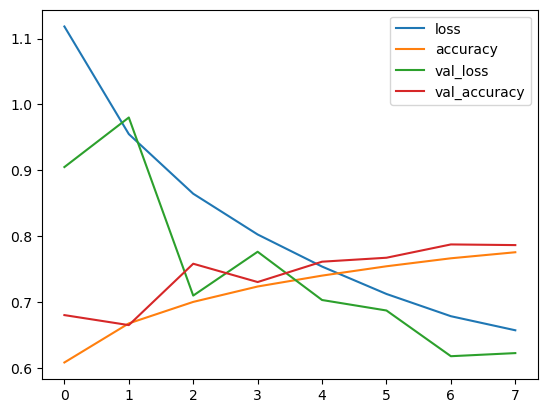

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
pd.DataFrame(history.history).plot() 
plt.show()

In [32]:
from PIL import Image, ImageFilter
# Opening the image (R prefixed to string
# in order to deal with '\' in paths)
image = Image.open(r"aeroplane.jpeg")
# Converting the image to grayscale, as edge detection
# requires input image to be of mode = Grayscale (L)

In [33]:
image = image.convert("L")
# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
image = image.filter(ImageFilter.FIND_EDGES)
# Saving the Image Under the name Edge_Sample.png

image.save(r"Edge_Sample.png")

In [21]:
from PIL import Image, ImageFilter
img = Image.open(r"aeroplane.jpeg")
# Converting the image to grayscale, as Sobel Operator requires
# input image to be of mode Grayscale (L)
img = img.convert("L")
# Calculating Edges using the passed laplican Kernel
final = img.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,
-1, -1, -1, -1), 1, 0))
final.save("EDGE_sample.png")

In [23]:
import cv2
import numpy as np
from scipy import ndimage
roberts_cross_v = np.array( [[1, 0 ],
[0,-1 ]] )
roberts_cross_h = np.array( [[ 0, 1 ],
[ -1, 0 ]] )
img = cv2.imread("aeroplane.jpeg",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imwrite("output.jpg",edged_img)

True

In [24]:
# Read in the image
image = cv2.imread('aeroplane.jpeg')

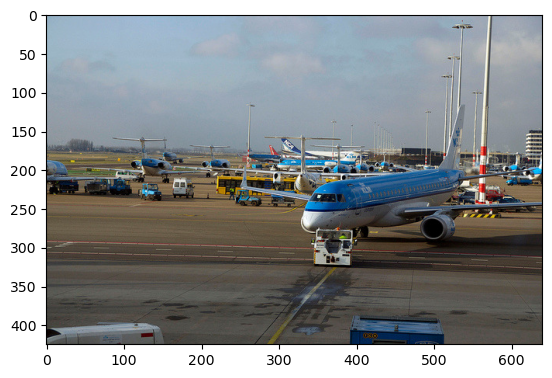

In [25]:
# Make a copy of the image
image_copy = np.copy(image)
# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

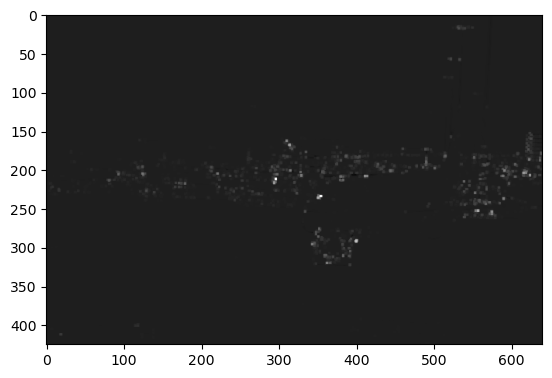

In [26]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
# Detect corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)
plt.imshow(dst, cmap='gray')

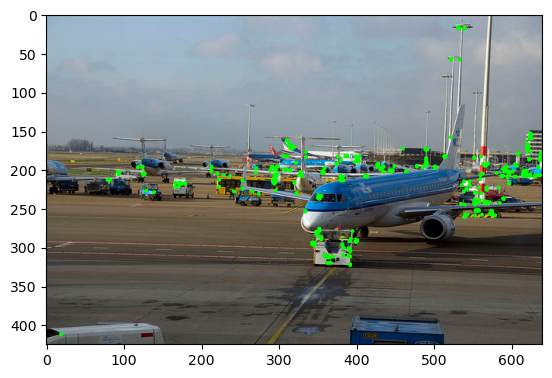

In [28]:
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()
# Create an image copy to draw corners on
corner_image = np.copy(image_copy)
# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
# image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)
plt.imshow(corner_image)